# Introduction to Time Series with Pandas

A lot of our financial data will have a datatime index, so let's learn how to deal with this sort of data with pandas!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
from datetime import datetime

In [4]:
# To illustrate the order of arguments
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_second = 15

In [9]:
# January 2nd, 2017 at 13:30:15
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)

In [10]:
my_date_time

datetime.datetime(2017, 1, 2, 13, 30, 15)

You can grab any part of the datetime object you want

In [8]:
my_date.day

2

In [11]:
my_date_time.hour

13

### Pandas with Datetime Index

You'll usually deal with time series as an index when working with pandas dataframes obtained from some sort of financial API. Fortunately pandas has a lot of functions and methods to work with time series!

In [5]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})
df['date'] = pd.to_datetime(df['date'])
df['date']

0   2000-03-10
1   2000-03-11
2   2000-03-12
Name: date, dtype: datetime64[ns]

In [16]:
first_six=['2016/1/1', '2016/1/2', '2016/1/3', '2016/1/4', '2016/1/5', '2016/1/6']

In [17]:
# Converted to an index
dt_ind = pd.DatetimeIndex(first_six)
dt_ind

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq=None)

In [18]:
# Attached to some random data
data = np.random.randn(6,2)
print(data)
cols = ['A','B']

[[ 0.3405415   1.25366921]
 [-1.52411316 -1.24470937]
 [ 0.76534843  1.22777995]
 [-0.14317219  0.4403125 ]
 [ 1.1990741   1.76597026]
 [-0.23141415 -0.32679959]]


In [19]:
df = pd.DataFrame(data,dt_ind,cols)

In [20]:
df

,A,B
2016-01-01,0.340542,1.253669
2016-01-02,-1.524113,-1.244709
2016-01-03,0.765348,1.227780
2016-01-04,-0.143172,0.440312
2016-01-05,1.199074,1.765970
2016-01-06,-0.231414,-0.326800


In [21]:
df.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq=None)

In [15]:
df.index.max()

Timestamp('2016-01-02 00:00:00')

In [38]:
df.index.min()

Timestamp('2016-01-01 00:00:00')

In [29]:
df[df.index>datetime(2016, 1, 3)]

,A,B
2016-01-04,-0.143172,0.440312
2016-01-05,1.199074,1.765970
2016-01-06,-0.231414,-0.326800


In [27]:
#df.index>datetime('2016-01-03')
df[df.index>pd.Timestamp('2016-01-03')]

,A,B
2016-01-04,-0.143172,0.440312
2016-01-05,1.199074,1.765970
2016-01-06,-0.231414,-0.326800


In [36]:
df.sort_index(ascending=False)

,A,B
2016-01-06,-0.231414,-0.326800
2016-01-05,1.199074,1.765970
2016-01-04,-0.143172,0.440312
2016-01-03,0.765348,1.227780
2016-01-02,-1.524113,-1.244709
2016-01-01,0.340542,1.253669


# Rolling and Expanding

A very common process with time series is to create data based off of a rolling mean. Let's show you how to do this easily with pandas!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Best way to read in data with time series index!
df = pd.read_csv('walmart_stock.csv',index_col='Date',parse_dates=True)

In [4]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


<AxesSubplot:xlabel='Date'>

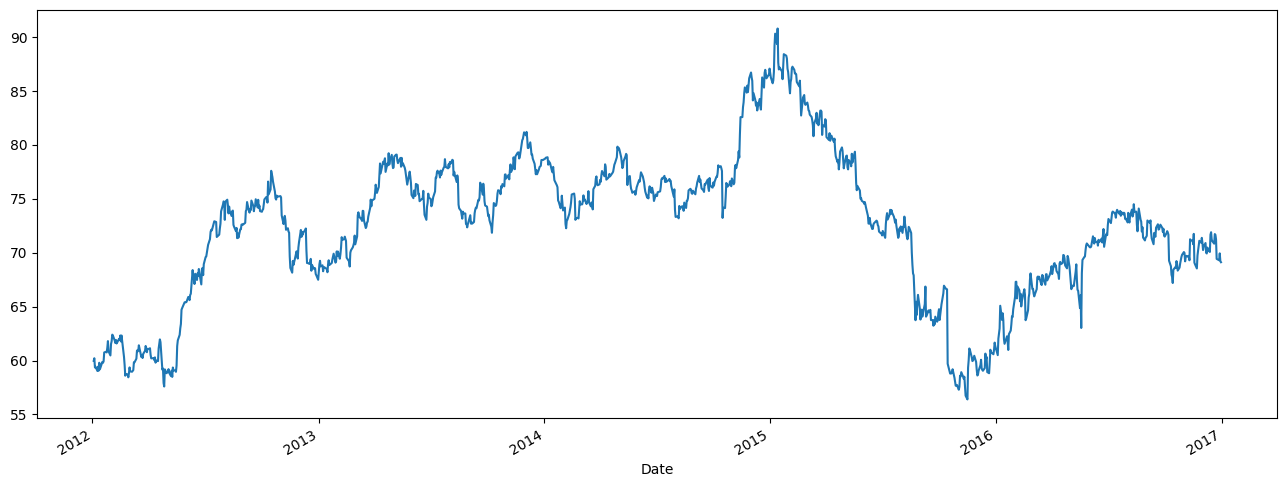

In [5]:
df['Open'].plot(figsize=(16,6))

Now let's add in a rolling mean! This rolling method provides row entries, where every entry is then representative of the window. 

In [6]:
# 7 day rolling mean
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


<AxesSubplot:xlabel='Date'>

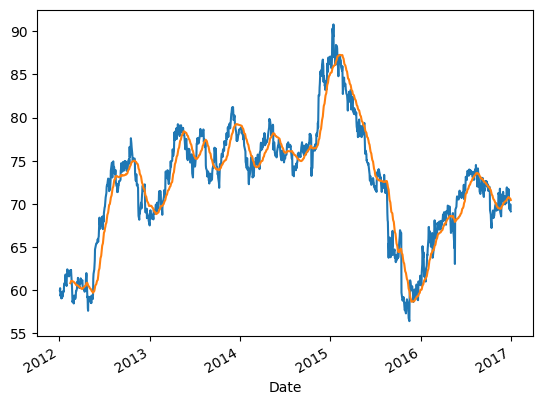

In [7]:
df['Open'].plot()
df.rolling(window=30).mean()['Close'].plot()

Easiest way to add a legend is to make this rolling value a new column, then pandas does it automatically!

<AxesSubplot:xlabel='Date'>

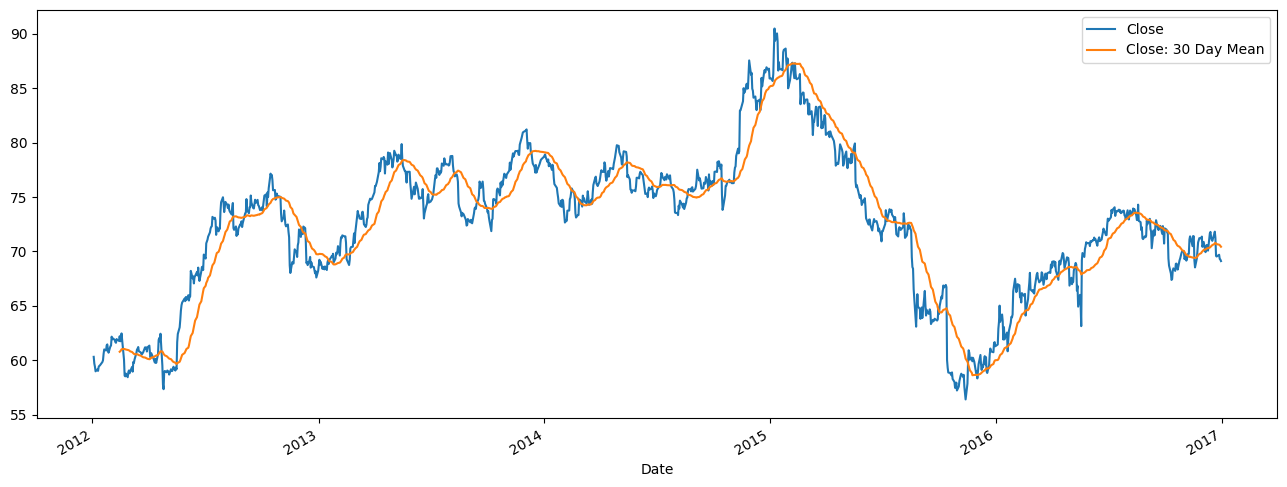

In [8]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

## expanding

Now what if you want to take into account everything from the start of the time series as a rolling value? For instance, not just take into account a period of 7 days, or monthly rolling average, but instead, take into everything since the beginning of the time series, continuously:

In [10]:
df['expanding_close']=df['Close'].expanding(min_periods=1).mean()
df.head()

,Open,High,Low,Close,Volume,Adj Close,Close: 30 Day Mean,expanding_close
Date,,,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235,NaN,60.330002
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475,NaN,60.020001
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539,NaN,59.820000
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220,NaN,59.615000
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215,NaN,59.528000


<AxesSubplot:xlabel='Date'>

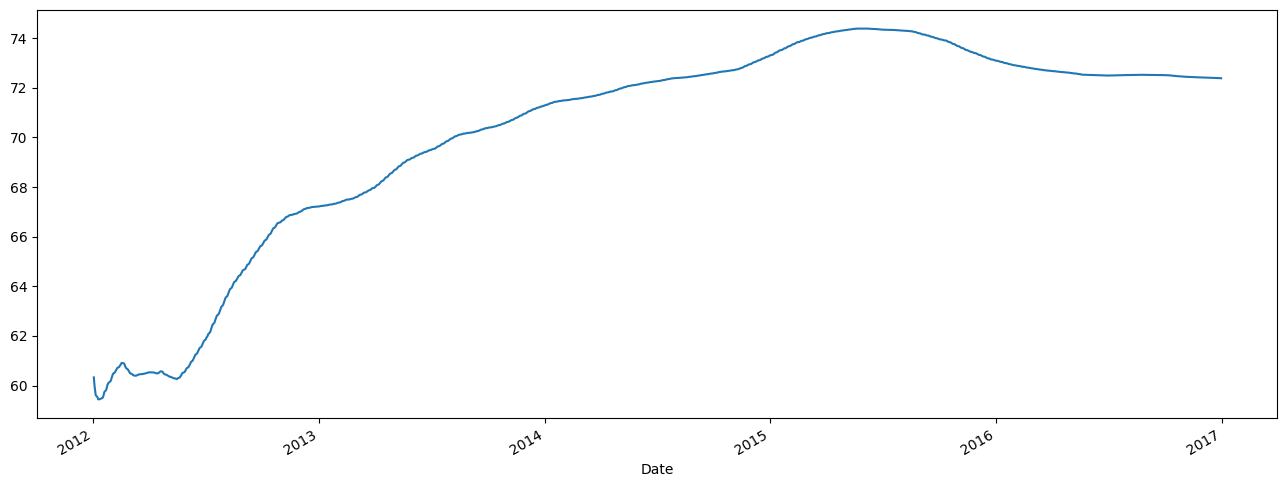

In [11]:
# Optional specify a minimum number of periods
df['expanding_close'].plot(figsize=(16,6))

## Bollinger Bands

We will talk a lot more about financial analysis plots and technical indicators, but here is one worth mentioning!

More info : http://www.investopedia.com/terms/b/bollingerbands.asp

*Developed by John Bollinger, Bollinger Bands® are volatility bands placed above and below a moving average. Volatility is based on the standard deviation, which changes as volatility increases and decreases. The bands automatically widen when volatility increases and narrow when volatility decreases. This dynamic nature of Bollinger Bands also means they can be used on different securities with the standard settings. For signals, Bollinger Bands can be used to identify Tops and Bottoms or to determine the strength of the trend.*

Key varaible for bollinger brands: 
1. 20d SMA
2. volatilities
3. Bands should contain 88-89% of the price movement

*Bollinger Bands reflect direction with the 20-period SMA and volatility with the upper/lower bands. As such, they can be used to determine if prices are relatively high or low. According to Bollinger, the bands should contain 88-89% of price action, which makes a move outside the bands significant. Technically, prices are relatively high when above the upper band and relatively low when below the lower band. However, relatively high should not be regarded as bearish or as a sell signal. Likewise, relatively low should not be considered bullish or as a buy signal. Prices are high or low for a reason. As with other indicators, Bollinger Bands are not meant to be used as a stand alone tool. *

<AxesSubplot:xlabel='Date'>

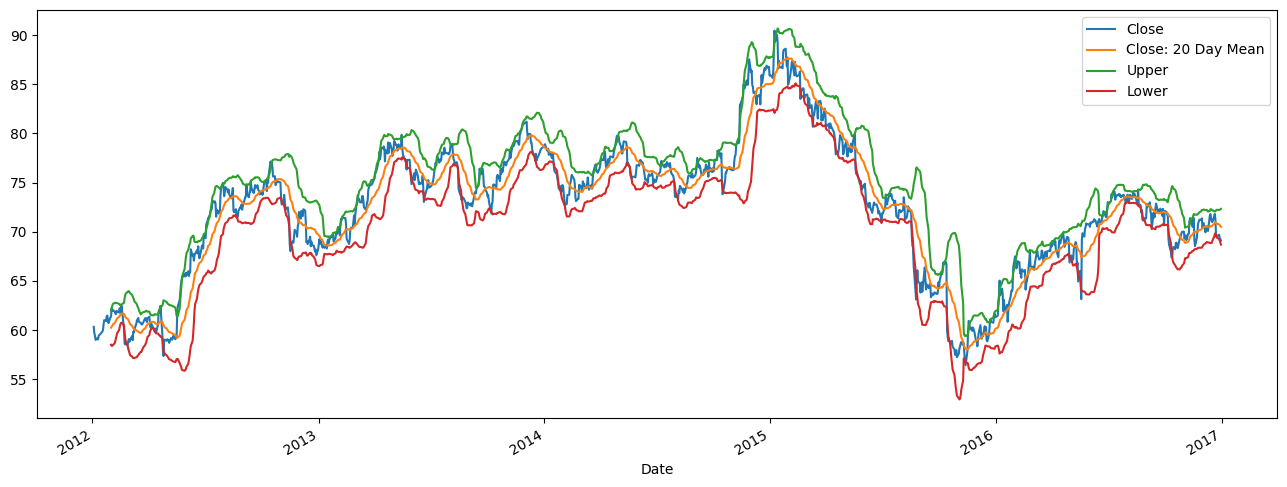

In [13]:
df['Close: 20D SMA'] = df['Close'].rolling(window=20).mean()
df['Upper'] = df['Close: 20 Day Mean'] + 2*df['Close'].rolling(window=20).std()
df['Lower'] = df['Close: 20 Day Mean'] - 2*df['Close'].rolling(window=20).std()
df[['Close','Close: 20 Day Mean','Upper','Lower']].plot(figsize=(16,6))

# Time Resampling

Let's learn how to sample time series data! This will be useful later on in the course!

In [2]:
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# Grab data
# Faster alternative
df = pd.read_csv('walmart_stock.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


Create a date index from the date column

In [7]:
df['Date'] = df['Date'].apply(pd.to_datetime)

In [8]:
df.set_index('Date',inplace=True)

In [9]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


## resample()

A common operation with time series data is resamplling based on the time series index. Let see how to use the resample() method.

#### All possible time series offest strings
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [10]:
# Our index
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [14]:
# quarter max
df.resample(rule='Q').max()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,62.400002,62.630001,61.910000,62.480000,28630200,54.494442
2012-06-30,68.940002,69.720001,68.559998,69.720001,38007300,61.631517
2012-09-30,74.959999,75.239998,74.449997,75.139999,17813200,66.781948
2012-12-31,77.599998,77.599998,76.690002,77.150002,23401900,68.568371
2013-03-31,74.930000,75.110001,74.430000,74.849998,25683700,67.324929
2013-06-30,79.230003,79.959999,78.900002,79.860001,14564500,72.262093
2013-09-30,78.680000,79.000000,78.430000,78.769997,14972300,71.275793
2013-12-31,81.209999,81.370003,80.820000,81.209999,10633700,73.929868
2014-03-31,78.860001,79.470001,78.519997,78.910004,17160200,72.254228


### Custom Resampling

You could technically also create your own custom resampling function:

In [12]:
def last_day(entry):
    """
    Returns the last instance of the period, regardless of samplling rate.
    """
    return entry[-1]

In [13]:
df.resample(rule='A').apply(last_day)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.489998,68.300003,67.370003,68.230003,7012500,60.977077
2013-12-31,78.660004,78.870003,78.349998,78.690002,3859100,72.052783
2014-12-31,87.080002,87.440002,85.860001,85.879997,4151400,80.606085
2015-12-31,61.330002,61.720001,61.169998,61.299999,6555100,59.135363
2016-12-31,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


Text(0.5, 1.0, 'Yearly Mean Close Price for Walmart')

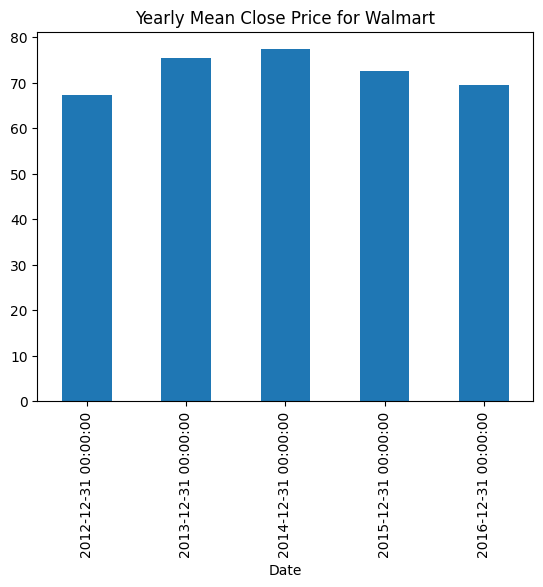

In [14]:
df['Close'].resample('A').mean().plot(kind='bar')
plt.title('Yearly Mean Close Price for Walmart')

Text(0.5, 1.0, 'Monthly Max Opening Price for Walmart')

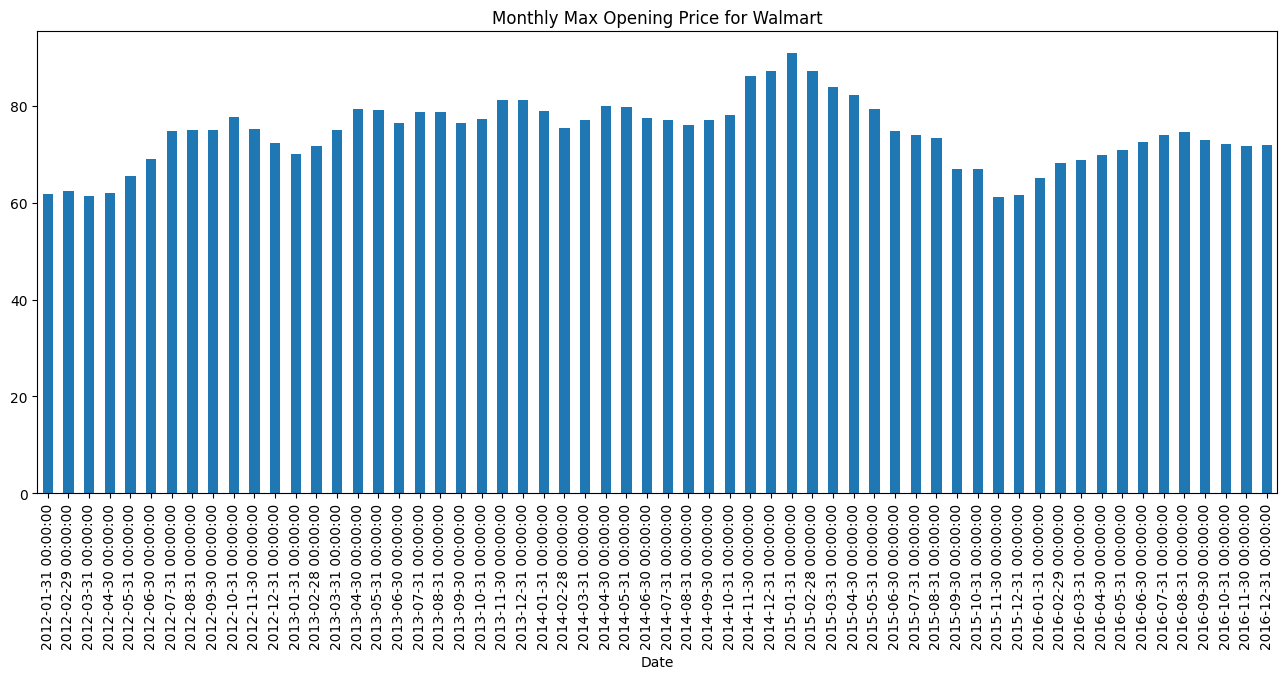

In [15]:
df['Open'].resample('M').max().plot(kind='bar',figsize=(16,6))
plt.title('Monthly Max Opening Price for Walmart')

# Time Shifting

Sometimes you may need to shift all your data up or down along the time series index, in fact, a lot of pandas built-in methods do this under the hood. This isn't something we won't do often in the course, but its definitely good to know about this anyways!

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('walmart_stock.csv',index_col='Date')
df.index = pd.to_datetime(df.index)

In [3]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [4]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456
2016-12-30,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


## .shift() forward

In [23]:
df.shift(1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


In [24]:
# You will lose that last piece of data that no longer has an index!
df.shift(1).tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,71.239998,71.239998,69.209999,69.589996,12106800.0,69.082042
2016-12-27,69.430000,69.750000,69.360001,69.540001,4803900.0,69.032411
2016-12-28,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-29,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-30,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456


## shift() backwards

In [25]:
df.shift(-1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-04,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-05,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220
2012-01-06,59.029999,59.549999,58.919998,59.180000,6679300.0,51.616215
2012-01-09,59.430000,59.709999,58.980000,59.040001,6907300.0,51.494109


In [26]:
df.shift(-1).tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-27,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-28,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456
2016-12-29,69.120003,69.430000,68.830002,69.120003,6889500.0,68.615479
2016-12-30,NaN,NaN,NaN,NaN,NaN,NaN


Now moving on to the next topic

## Introduction

Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. He created it to try to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you.

It is an excellent 2D and 3D graphics library for generating scientific figures. 

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general

Matplotlib allows you to create reproducible figures programmatically. Let's learn how to use it! Before continuing this lecture, I encourage you just to explore the official Matplotlib web page: http://matplotlib.org/

## Installation 

You'll need to install matplotlib first with either:

    conda install matplotlib
or
    pip install matplotlib
    
## Importing

Import the `matplotlib.pyplot` module under the name `plt` (the tidy way):

In [10]:
import matplotlib.pyplot as plt

You'll also need to use this line to see plots in the notebook:

In [11]:
%matplotlib inline

That line is only for jupyter notebooks, if you are using another editor, you'll use: **plt.show()** at the end of all your plotting commands to have the figure pop up in another window.

# Basic Example

Let's walk through a very simple example using two numpy arrays:

### Example

Let's walk through a very simple example using two numpy arrays. You can also use lists, but most likely you'll be passing numpy arrays or pandas columns (which essentially also behave like arrays).

** The data we want to plot:**

In [12]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [13]:
print(x)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


In [14]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

## Basic Matplotlib Commands

We can create a very simple line plot using the following ( I encourage you to pause and use Shift+Tab along the way to check out the document strings for the functions we are using).

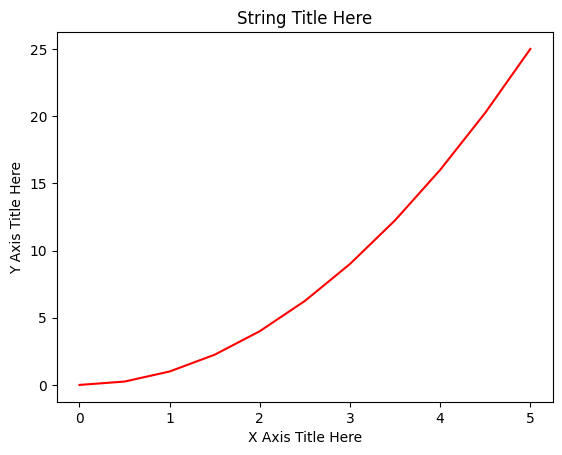

In [15]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

## Creating Multiplots on Same Canvas

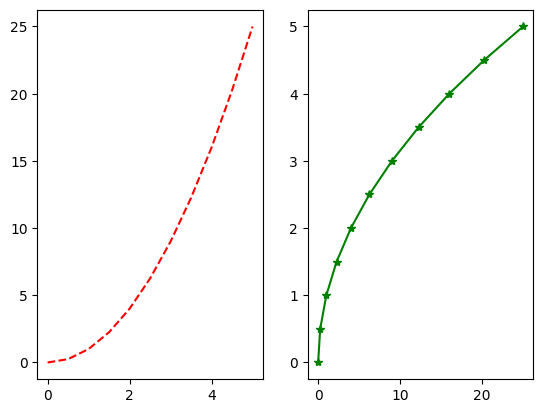

In [45]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

___
# Matplotlib Object Oriented Method
Now that we've seen the basics, let's break it all down with a more formal introduction of Matplotlib's Object Oriented API. This means we will instantiate figure objects and then call methods or attributes from that object.

## Introduction to the Object Oriented Method

The main idea in using the more formal Object Oriented method is to create figure objects and then just call methods or attributes off of that object. This approach is nicer when dealing with a canvas that has multiple plots on it. 

To begin we create a figure instance. Then we can add axes to that figure:

Text(0.5, 1.0, 'Set Title')

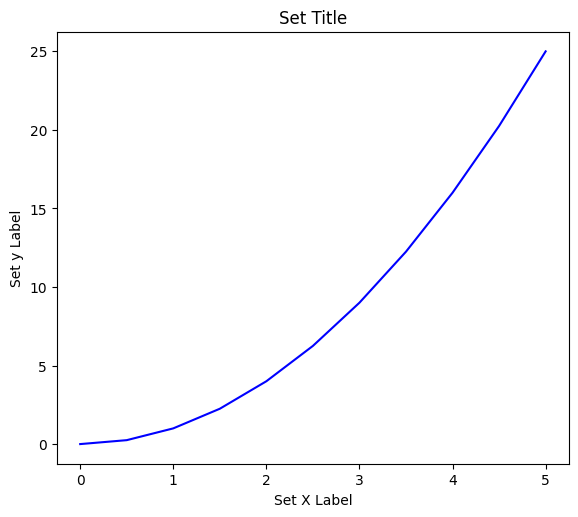

In [27]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.5, 0.8, 0.9]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

Code is a little more complicated, but the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

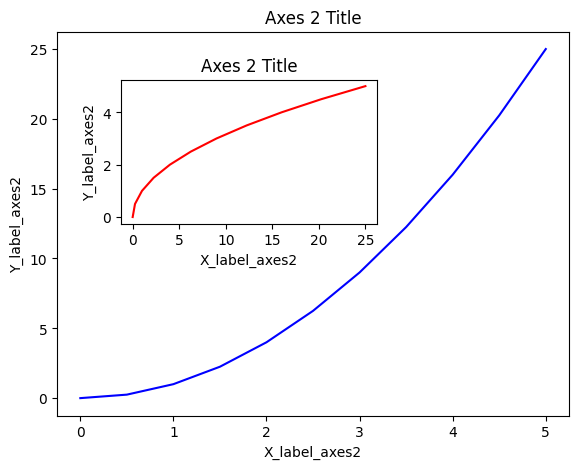

In [28]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

## subplots()

The plt.subplots() object will act as a more automatic axis manager.

Basic use cases:

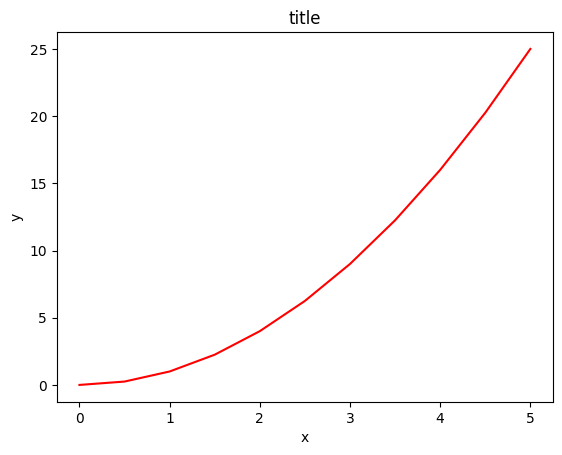

In [29]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Then you can specify the number of rows and columns when creating the subplots() object:

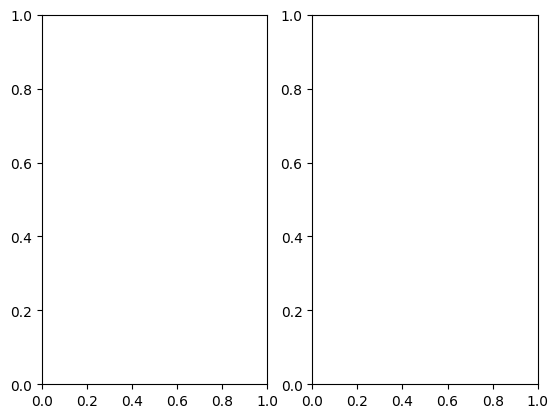

In [30]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [31]:
# Axes is an array of axes to plot on
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

We can iterate through this array:

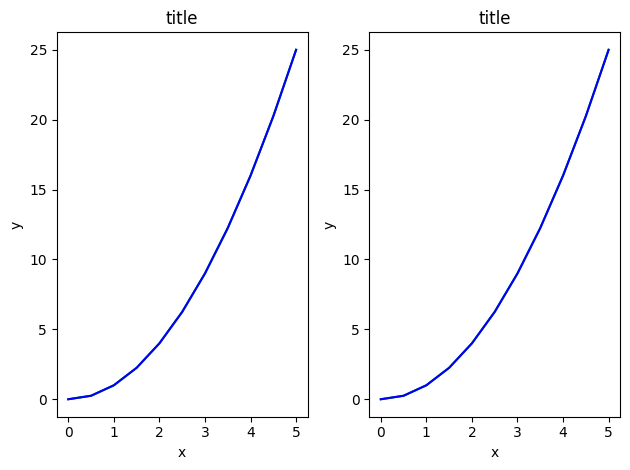

<Figure size 640x480 with 0 Axes>

In [39]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
plt.tight_layout()
fig

A common issue with matplolib is overlapping subplots or figures. We ca use **fig.tight_layout()** or **plt.tight_layout()** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

For example:

In [43]:
fig = plt.figure(figsize=(8,4))

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function:

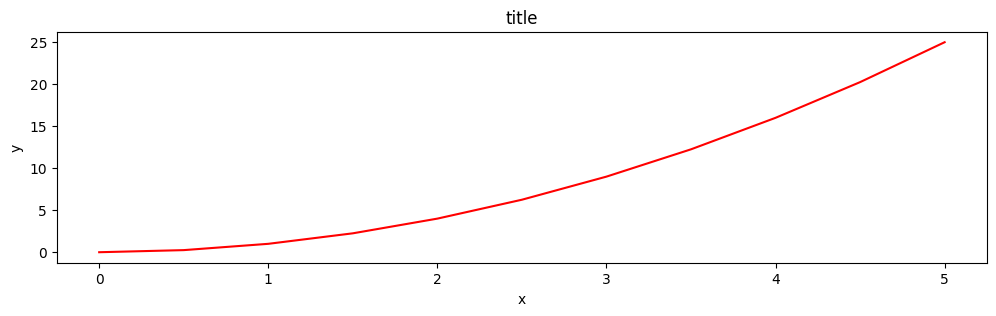

In [41]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [42]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

### Legends

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method without arguments to add the legend to the figure: 

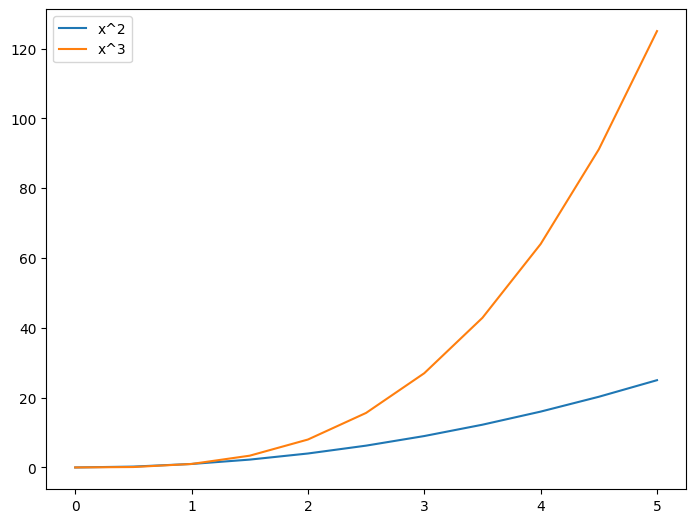

In [47]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x^2")
ax.plot(x, x**3, label="x^3")
ax.legend()

## Setting colors, linewidths, linetypes

Matplotlib gives you *a lot* of options for customizing colors, linewidths, and linetypes. 

There is the basic MATLAB like syntax (which I would suggest you avoid using for more clairty sake:

### Colors with MatLab like syntax

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

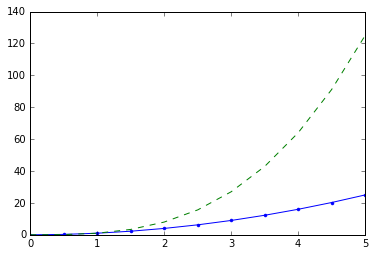

In [54]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

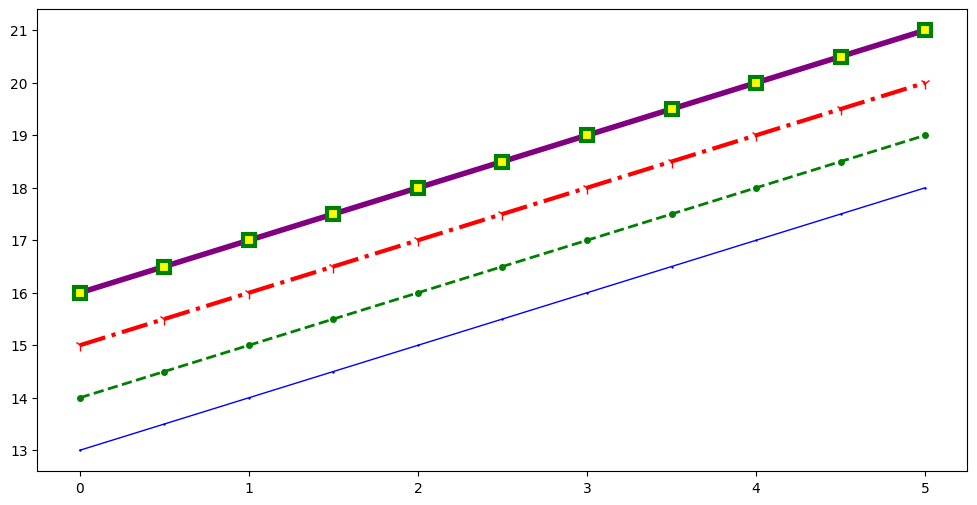

In [48]:
fig, ax = plt.subplots(figsize=(12,6))

# marker size and color
ax.plot(x, x+13, color="blue", lw=1, ls='-', marker='+', markersize=2)
ax.plot(x, x+14, color="green", lw=2, ls='--', marker='o', markersize=4)
ax.plot(x, x+15, color="red", lw=3, ls='-.', marker='1', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=4, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### Control over axis appearance

In this section we will look at controlling axis sizing properties in a matplotlib figure.

## Plot range

We can configure the ranges of the axes using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatically getting "tightly fitted" axes ranges:

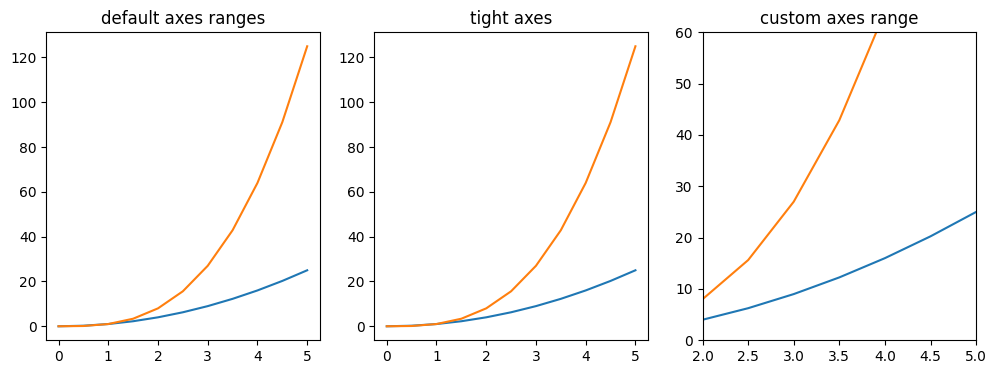

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

# Special Plot Types

There are many specialized plots we can create, such as barplots, histograms, scatter plots, and much more. Most of these type of plots we will actually create using seaborn, a statistical plotting library for Python. But here are a few examples of these type of plots:

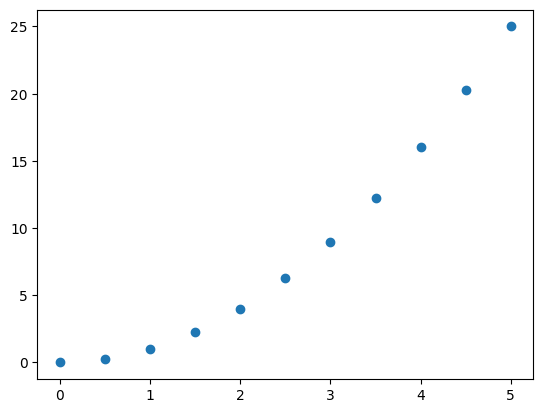

In [50]:
plt.scatter(x,y)

(array([11., 11.,  6.,  5.,  9.,  9., 17.,  3., 14., 15.]),
 array([ 18. , 116.1, 214.2, 312.3, 410.4, 508.5, 606.6, 704.7, 802.8,
        900.9, 999. ]),
 <BarContainer object of 10 artists>)

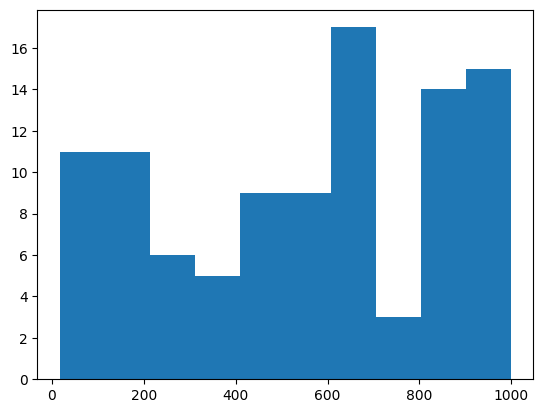

In [51]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

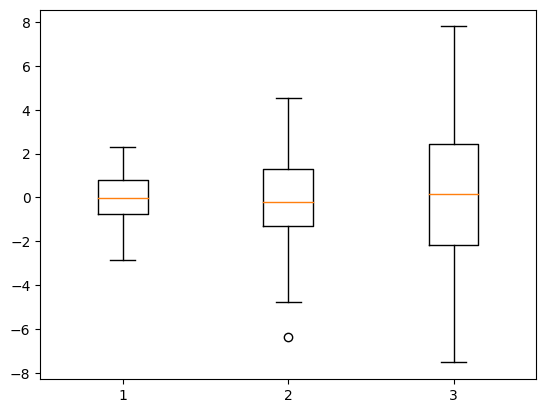

In [53]:
data = [np.random.normal(0, i, 100) for i in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True);   

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.


time for some matplotlib exercise

# Seaborn

In [2]:
pip install seaborn


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
     |████████████████████████████████| 11.7 MB 14.3 MB/s            
     |████████████████████████████████| 19.8 MB 23.0 MB/s            
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Not uninstalling numpy at /Users/louisalu/Library/Python/3.8/lib/python/site-packages, outside environment /Users/louisalu/Documents/04WSP/venv
    Can't uninstall 'numpy'. No files were found to uninstall.
You should consider upgrading via the '/Users/louisalu/Documents/04WSP/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


___
## Imports

In [1]:
import seaborn as sns
%matplotlib inline

## Data
Seaborn comes with built-in data sets!

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


## distplot

The distplot shows the distribution of a univariate set of observations.

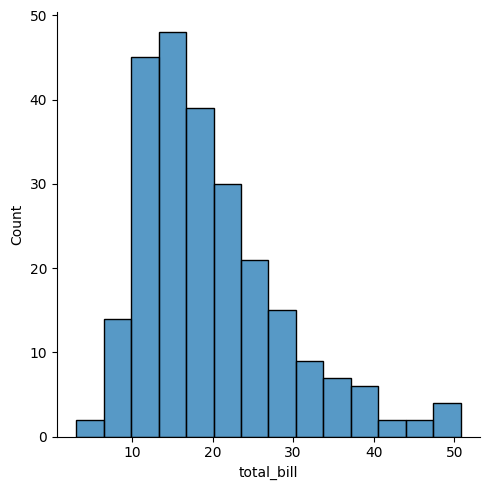

In [8]:
sns.displot(tips['total_bill'])
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

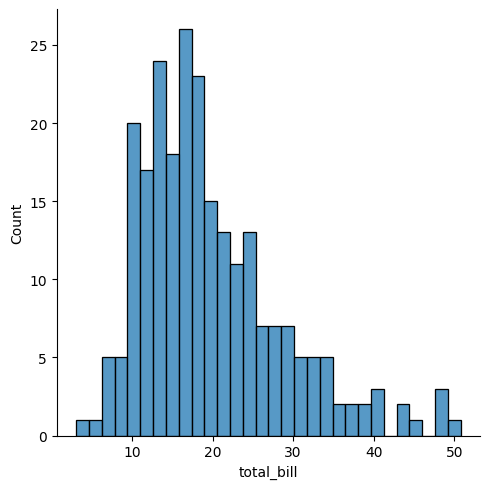

In [11]:
sns.displot(tips['total_bill'], bins=30)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

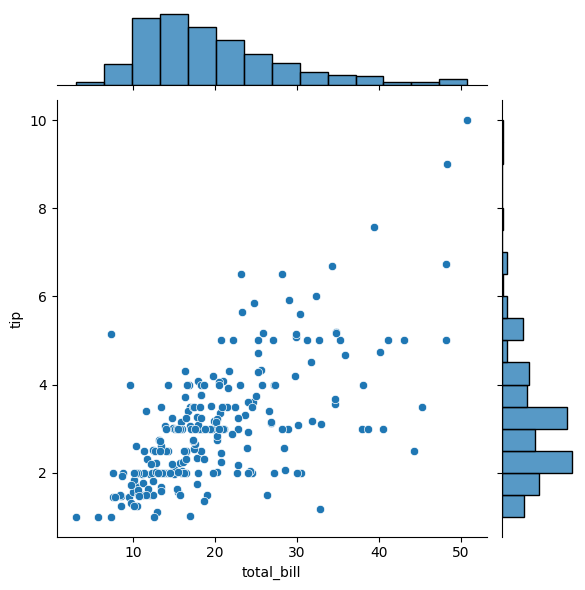

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

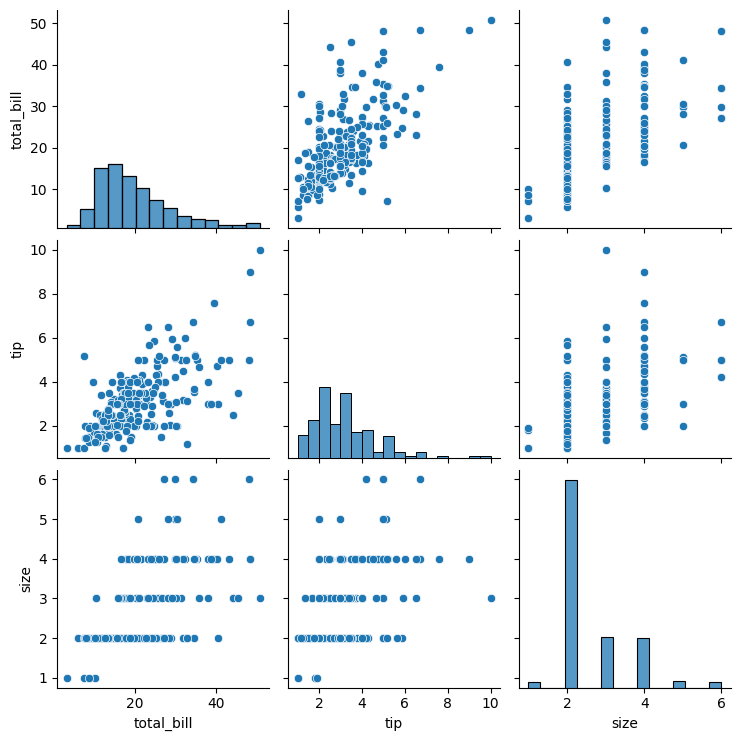

In [16]:
sns.pairplot(tips)

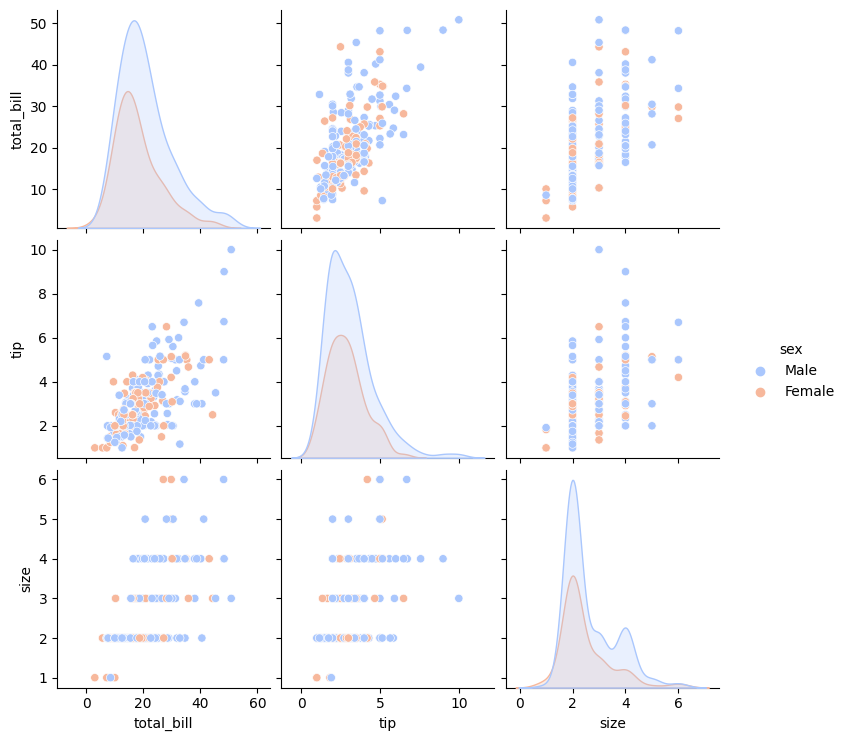

In [17]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

You can see all the color palette provided by seaborn here: https://seaborn.pydata.org/tutorial/color_palettes.html

# Categorical Data Plots


In [10]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [8]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

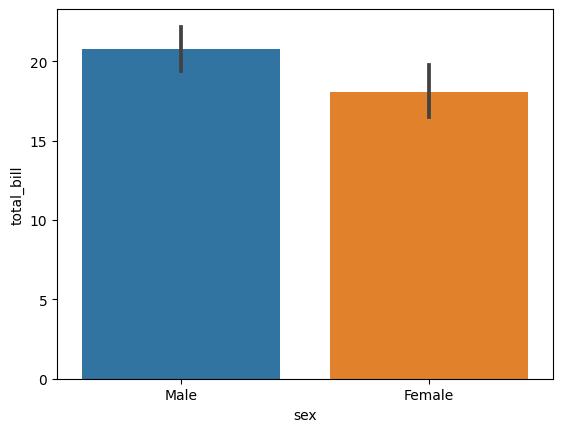

In [12]:
sns.barplot(x='sex',y='total_bill',data=tips)

You can change the estimator object to your own function, that converts a vector to a scalar:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

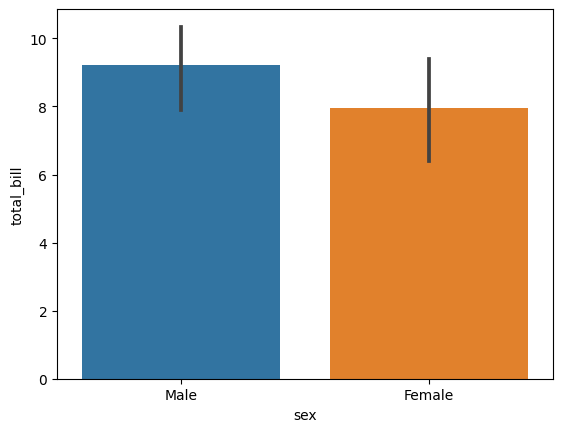

In [13]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<AxesSubplot:xlabel='sex', ylabel='count'>

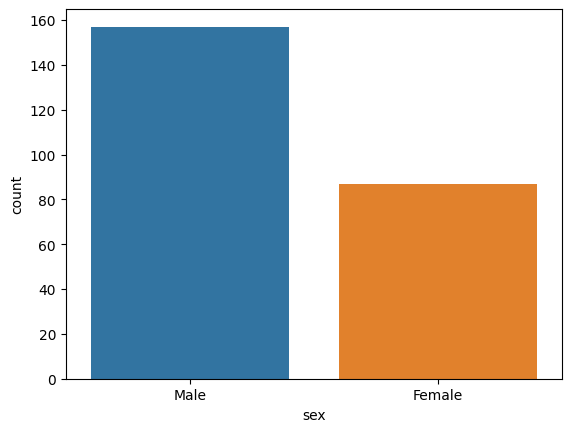

In [14]:
sns.countplot(x='sex',data=tips)

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

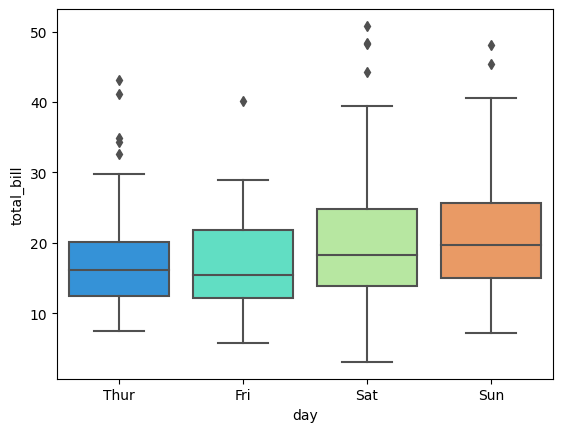

In [15]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')
#box plot is 50%, 25% and 75% wuth. min and max

<AxesSubplot:xlabel='day', ylabel='total_bill'>

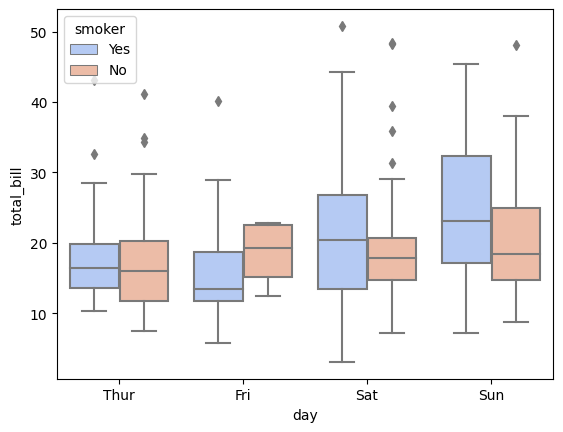

In [16]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

<AxesSubplot:xlabel='day', ylabel='total_bill'>

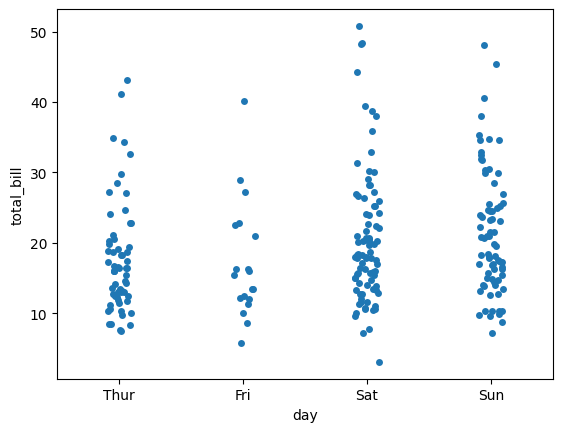

In [17]:
sns.stripplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

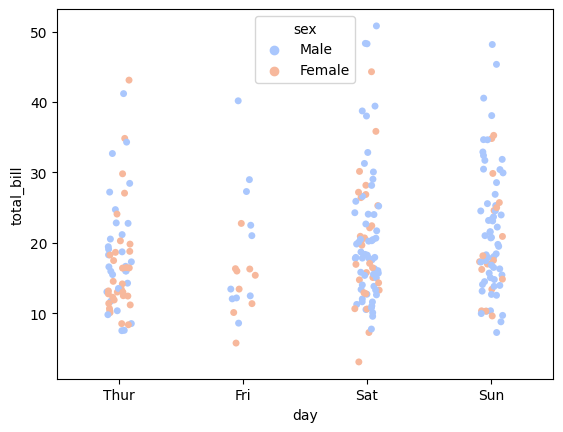

In [20]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='coolwarm')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

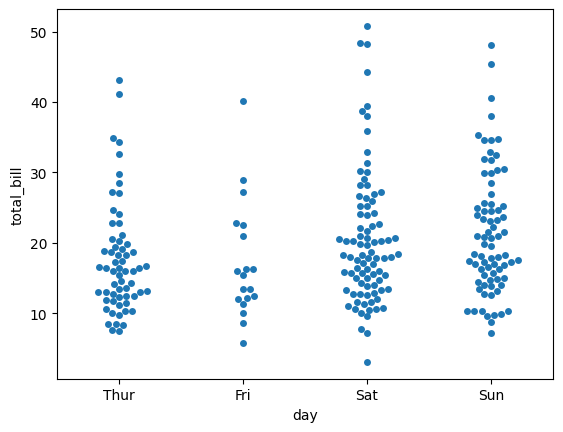

In [21]:
sns.swarmplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

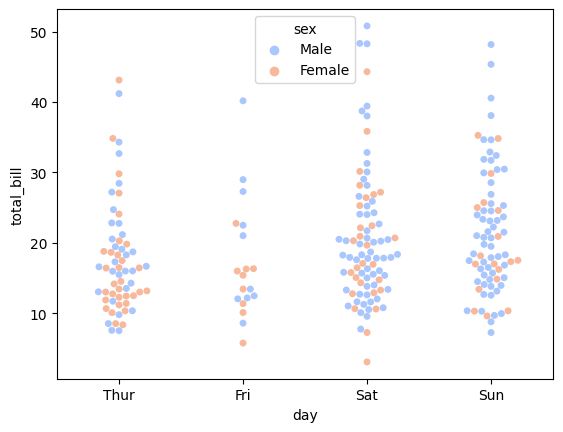

In [22]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="coolwarm")

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [8]:
import seaborn as sns
%matplotlib inline

In [9]:
flights = sns.load_dataset('flights')

In [10]:
tips = sns.load_dataset('tips')

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [23]:
print (len(flights))

144


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [14]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
# Matrix form for correlation data
tips_corr=tips.corr(numeric_only=True)

<AxesSubplot:>

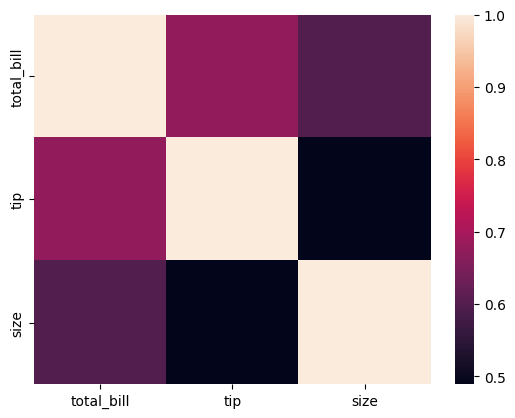

In [19]:
sns.heatmap(tips_corr)

<AxesSubplot:>

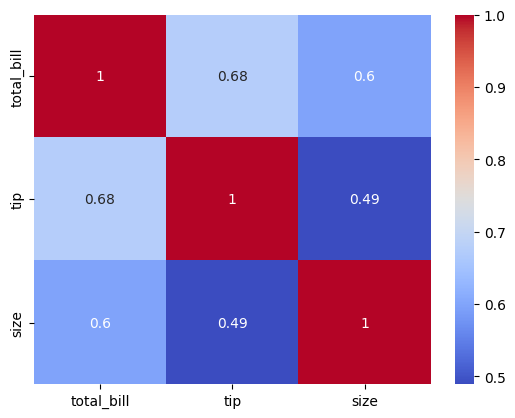

In [20]:
sns.heatmap(tips_corr,cmap='coolwarm',annot=True)

Or for the flights data:

In [25]:
pivot_flight=flights.pivot_table(values='passengers',index='month',columns='year')

<AxesSubplot:xlabel='year', ylabel='month'>

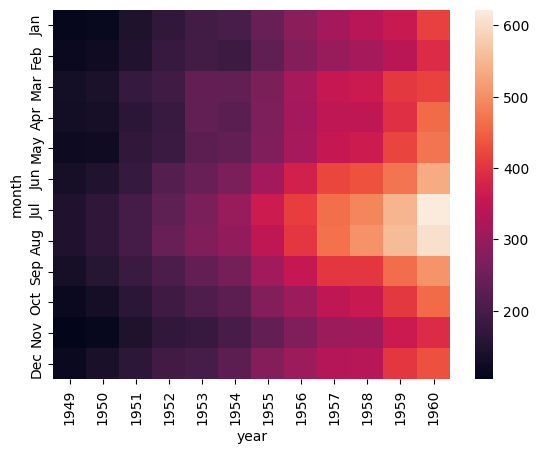

In [26]:
sns.heatmap(pivot_flight)

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [8]:
import seaborn as sns
%matplotlib inline

In [9]:
tips = sns.load_dataset('tips')

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot()

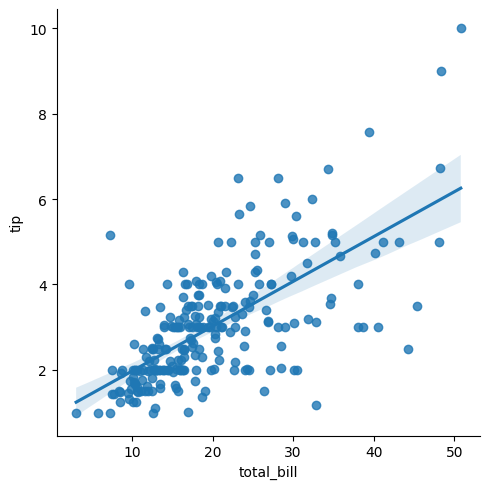

In [11]:
sns.lmplot(x='total_bill',y='tip',data=tips)

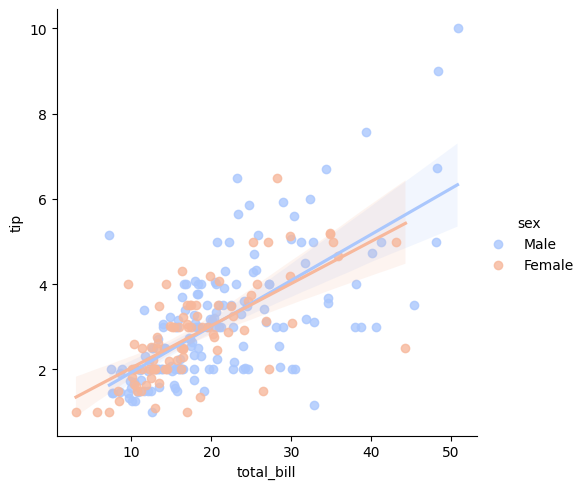

In [14]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

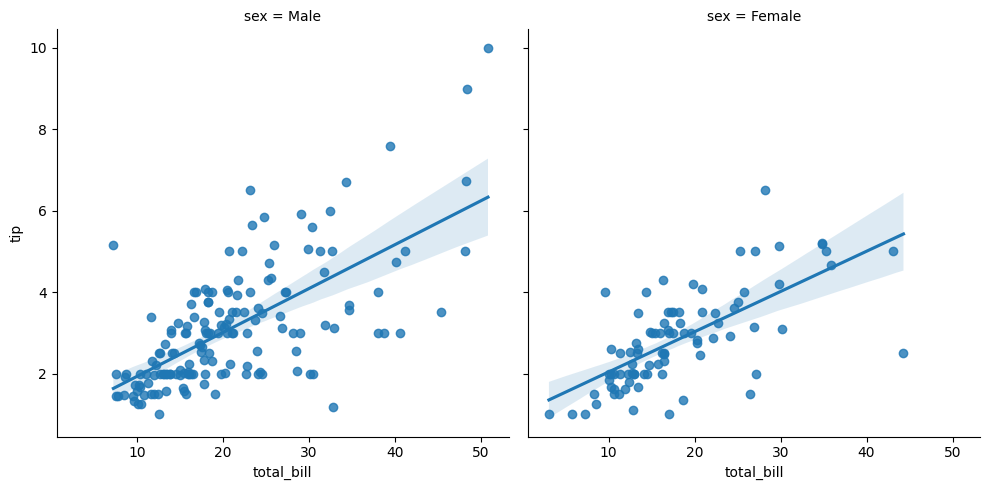

In [15]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

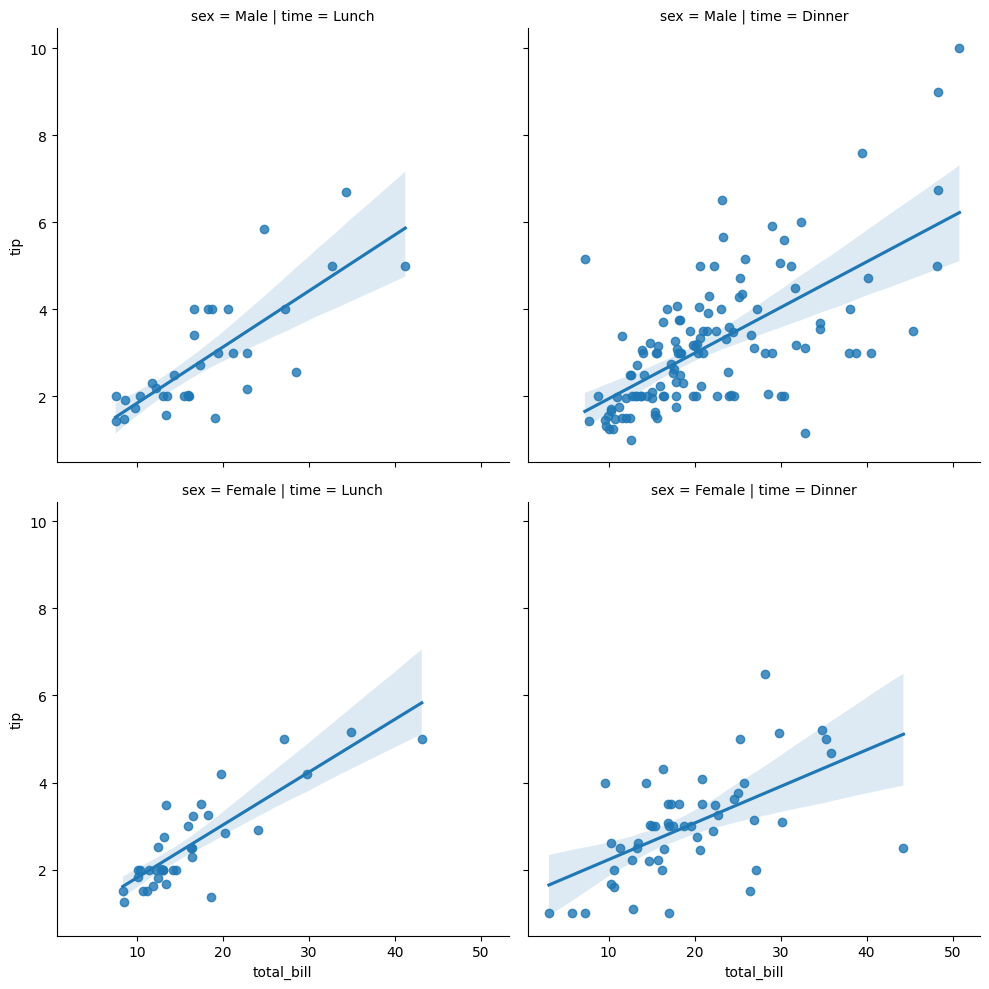

In [17]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

In [2]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

NameError: name 'sns' is not defined

___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Style and Color

We've shown a few times how to control figure aesthetics in seaborn, but let's now go over it formally:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
tips = sns.load_dataset('tips')

## Styles

You can set particular styles:

<AxesSubplot:xlabel='sex', ylabel='count'>

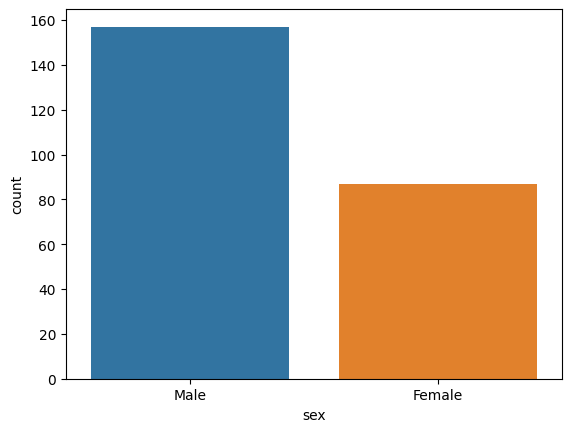

In [2]:
sns.countplot(x='sex',data=tips)

## Spine Removal

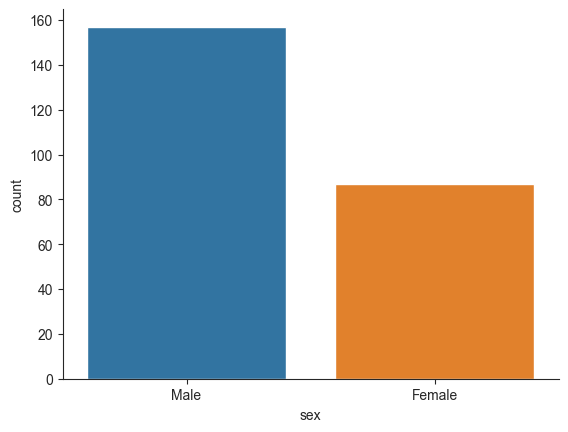

In [5]:
sns.countplot(x='sex',data=tips)
sns.despine()

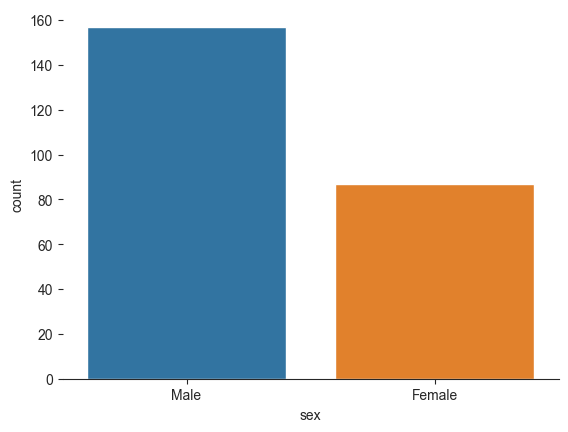

In [6]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

## Size and Aspect

You can use matplotlib's **plt.figure(figsize=(width,height) ** to change the size of most seaborn plots.

You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect. For example:

<AxesSubplot:xlabel='sex', ylabel='count'>

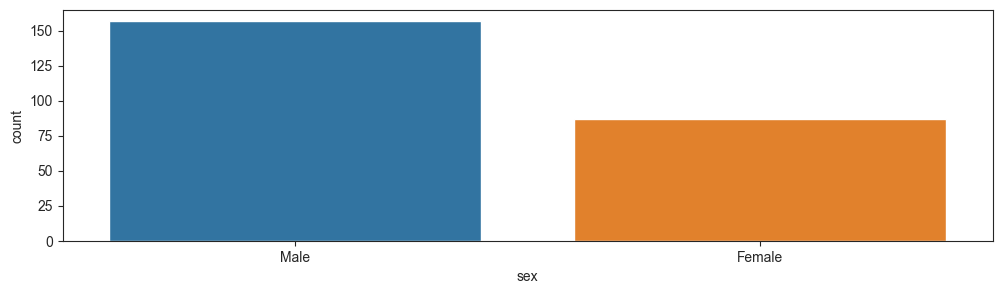

In [7]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

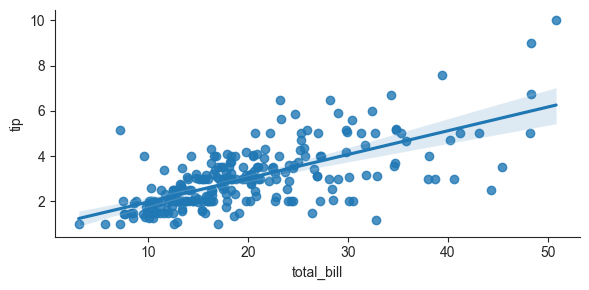

In [18]:
# Grid Type Plot
sns.lmplot(x='total_bill',y='tip',aspect=2, height=3, data=tips)

## Scale and Context

The set_context() allows you to override default parameters:

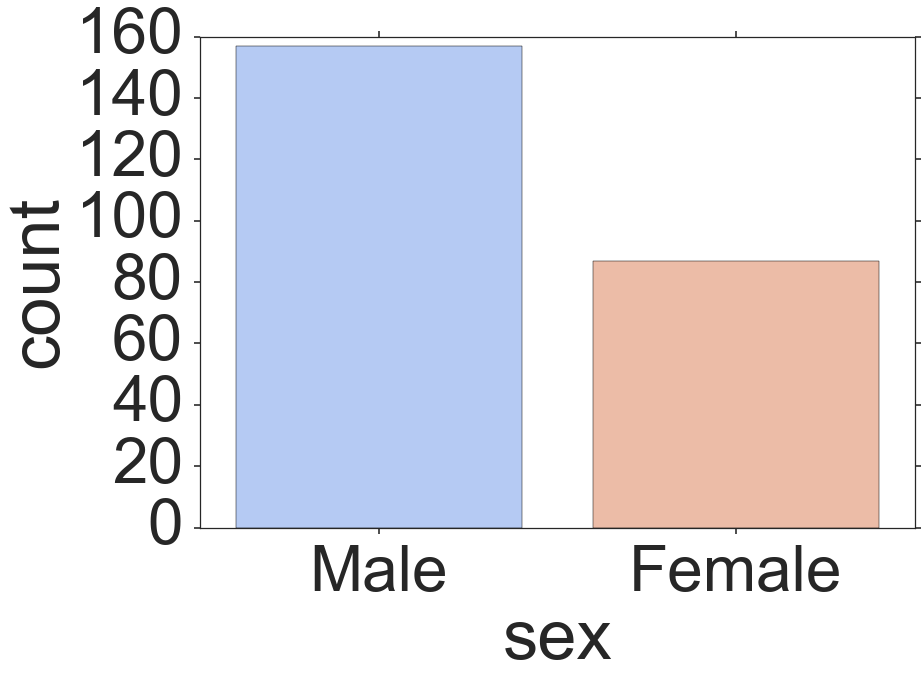

In [17]:
sns.set_context('poster',font_scale=4)
sns.countplot(x='sex',data=tips,palette='coolwarm')

Check out the documentation page for more info on these topics:
https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html

In [15]:
sns.puppyplot()

/Users/marci/anaconda/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


# Great Job!